# SOM applied to RGB data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The dataset consists of $N=3000$ points of type RGB, i.e., three number tuples in the range $[0,255]$ each.

The funcion `imshow` from the package `pyplot` can represent each point as a colour pixel. 

For example:

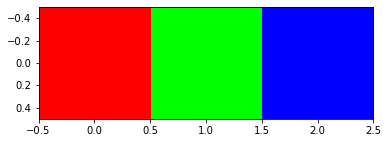

In [2]:
a = (255,0,0)
b = (0,255,0)
c = (0,0,255)
plt.imshow(np.array([a,b,c]).reshape(1,3,3))

Generation of the dataset

In [3]:
N = 3000
train_data = np.random.randint(0, 255, (N, 3))
train_data.shape,train_data[0]


((3000, 3), array([115,   4, 157]))

## Plot of dataset

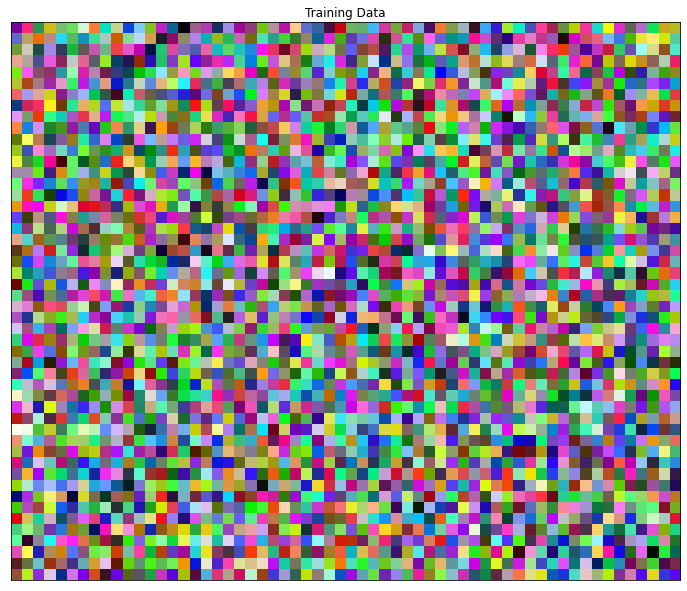

In [4]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(12, 12), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax.imshow(train_data.reshape(50, 60, 3))
ax.title.set_text('Training Data')

### Histograms of each channel

[]

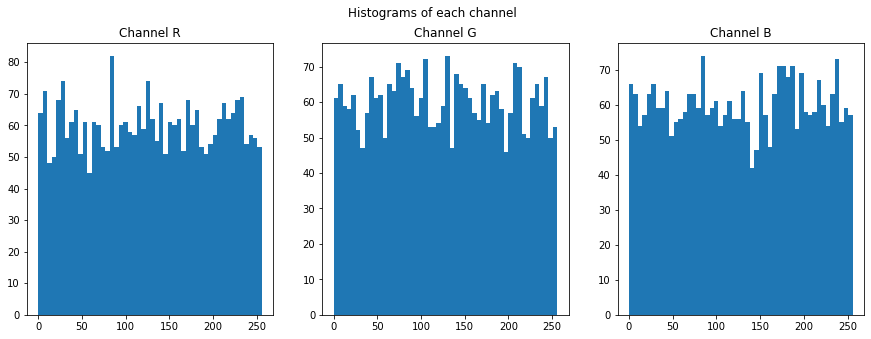

In [5]:
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
bins = 50
ax[0].hist(train_data[:][:,0],bins=bins,range=(0,256))
ax[0].set_title('Channel R')
ax[1].hist(train_data[:][:,1],bins=bins,range=(0,256))
ax[1].set_title('Channel G')
ax[2].hist(train_data[:][:,2],bins=bins,range=(0,256))
ax[2].set_title('Channel B')
f.suptitle('Histograms of each channel')
plt.plot()

First ten data points

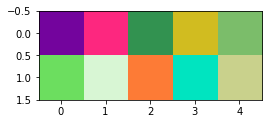

In [6]:
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
ax.imshow(train_data[0:10].reshape(2,5,3))

## Self Organizing Map

We use a SOM to cluster the dataset. The SOM will have $5\times 5=25$ cells. Each cell will be a 3 dimensional tuple. Cells will start with random numbers uniformly distributed in the interval $[0,255]$.

We will use a _rectangular_ vicinity scheme: each cell will have four neighbours.

In [7]:
# Dimensions
nrows = 10
ncols = 10
dimensions = 3

In [8]:
from som.som import som
smm = som(nrows=nrows,ncols=ncols,dimension=dimensions,vmax=255)

clase iniciada


In [9]:
smm.SOM[0,0]

array([139.9474435 , 182.37328842, 153.7046609 ])

The figure shows two random initializations of the untrained SOM.

clase iniciada


[]

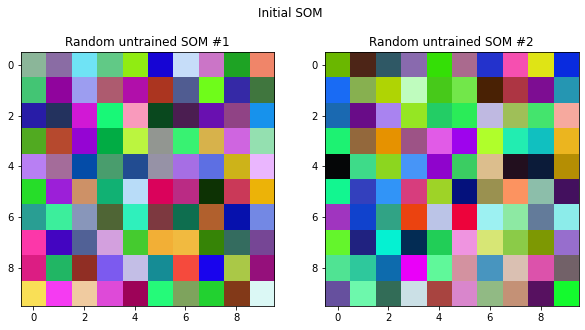

In [10]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].imshow(smm.SOM.astype('int'))
ax[0].set_title('Random untrained SOM #1')
smm2 = som(nrows=nrows,ncols=ncols,dimension=dimensions,vmax=255,randomState=1)
ax[1].imshow(smm2.SOM.astype('int'))
ax[1].set_title('Random untrained SOM #2')
f.suptitle('Initial SOM')
plt.plot()

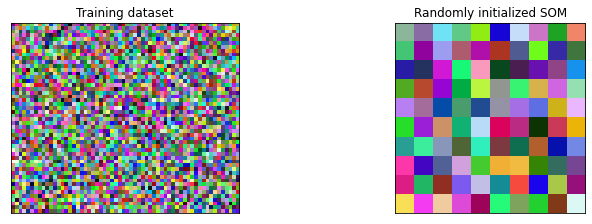

In [11]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training dataset')
ax[1].imshow(smm.SOM.astype(int))
ax[1].title.set_text('Randomly initialized SOM')


## Train som

We _feed_ the training data into the randomly initialized SOM

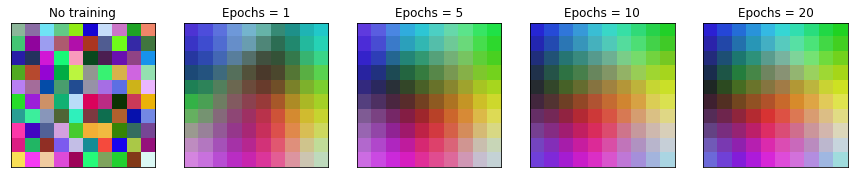

In [12]:
fig, ax = plt.subplots(
    nrows=1, ncols=5, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[])
)
ax[0].imshow(smm.SOM.astype(int))
ax[0].title.set_text('No training')
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(1,5)):
    total_epochs += epochs
    smm.train_SOM(train_data=train_data, epochs=epochs)
    SOM = smm.SOM
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

## Number of neurons in the SOM

We try using different numbers of neurons

